In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


In [70]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [37]:
sns.set_theme(context='talk', style='darkgrid', font='MS GOTHIC')
df = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv', index_col=0)
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [39]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [40]:
# カテゴリカルカラムと数値カラムに分ける
# priceは目的変数
cat_features = ['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class']
num_features = ['duration', 'days_left']

In [41]:
# cat_featuresのunique数と種類を確認
for feature in cat_features:
    print(f'{feature} : {df[feature].nunique()}')
    print(df[feature].unique())
    print('==============================')

airline : 6
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
flight : 1561
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
source_city : 6
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time : 6
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops : 3
['zero' 'one' 'two_or_more']
arrival_time : 6
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city : 6
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class : 2
['Economy' 'Business']


In [42]:
# airlineとflightの名前の関係性確認
df[['airline', 'flight']].sample(10)

,airline,flight
96928,Vistara,UK-812
221687,Vistara,UK-963
231922,Vistara,UK-958
265009,Vistara,UK-778
36722,Vistara,UK-963
104337,Indigo,6E-457
98076,Air_India,AI-505
225980,Air_India,AI-888
3848,SpiceJet,SG-8157
230903,Air_India,AI-687


In [43]:
# カラムを追加。文字列の'-'を境に分割、2つのカラムに分ける
df[['flight_code', 'flight_number']] = df['flight'].str.split('-', expand=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_code,flight_number
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,SG,8709
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,SG,8157
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,I5,764
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,UK,995
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,UK,963


In [44]:
# flight_codeとflight_numberをcat_featuresに追加
cat_features = cat_features + ['flight_code', 'flight_number']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
 11  flight_code       300153 non-null  object 
 12  flight_number     300153 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 32.1+ MB


In [45]:
# flight_numberをINTに変更
df['flight_number'] = df['flight_number'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
 11  flight_code       300153 non-null  object 
 12  flight_number     300153 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 32.1+ MB


In [46]:
df['flight_code'].unique()

array(['SG', 'I5', 'UK', 'G8', '6E', 'AI'], dtype=object)

In [47]:
# flight_codeとairlineが１対1で対応しているか確認
df[['airline', 'flight_code']].value_counts()

airline    flight_code
Vistara    UK             127859
Air_India  AI              80892
Indigo     6E              43120
GO_FIRST   G8              23173
AirAsia    I5              16098
SpiceJet   SG               9011
dtype: int64

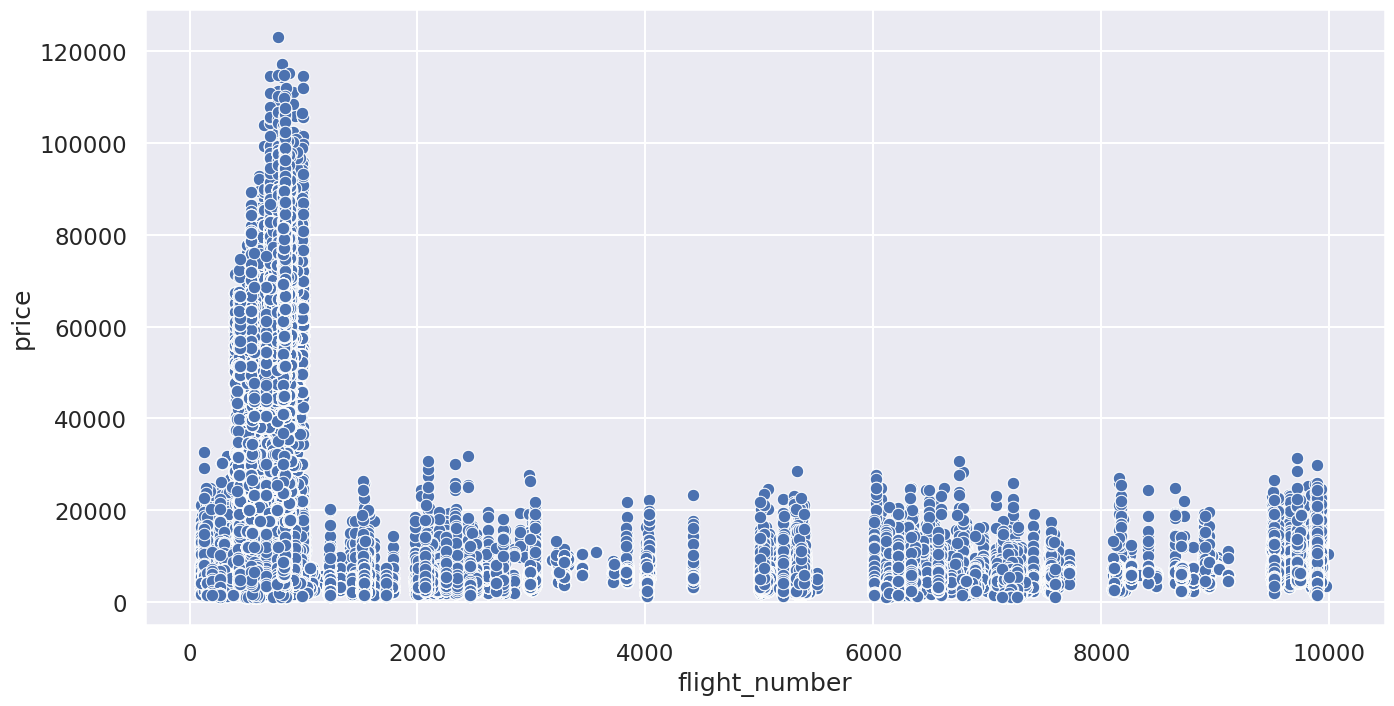

In [48]:
# flight_numberがチケットの価格と関係があるかどうかを確認
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='flight_number', y='price')
plt.show()

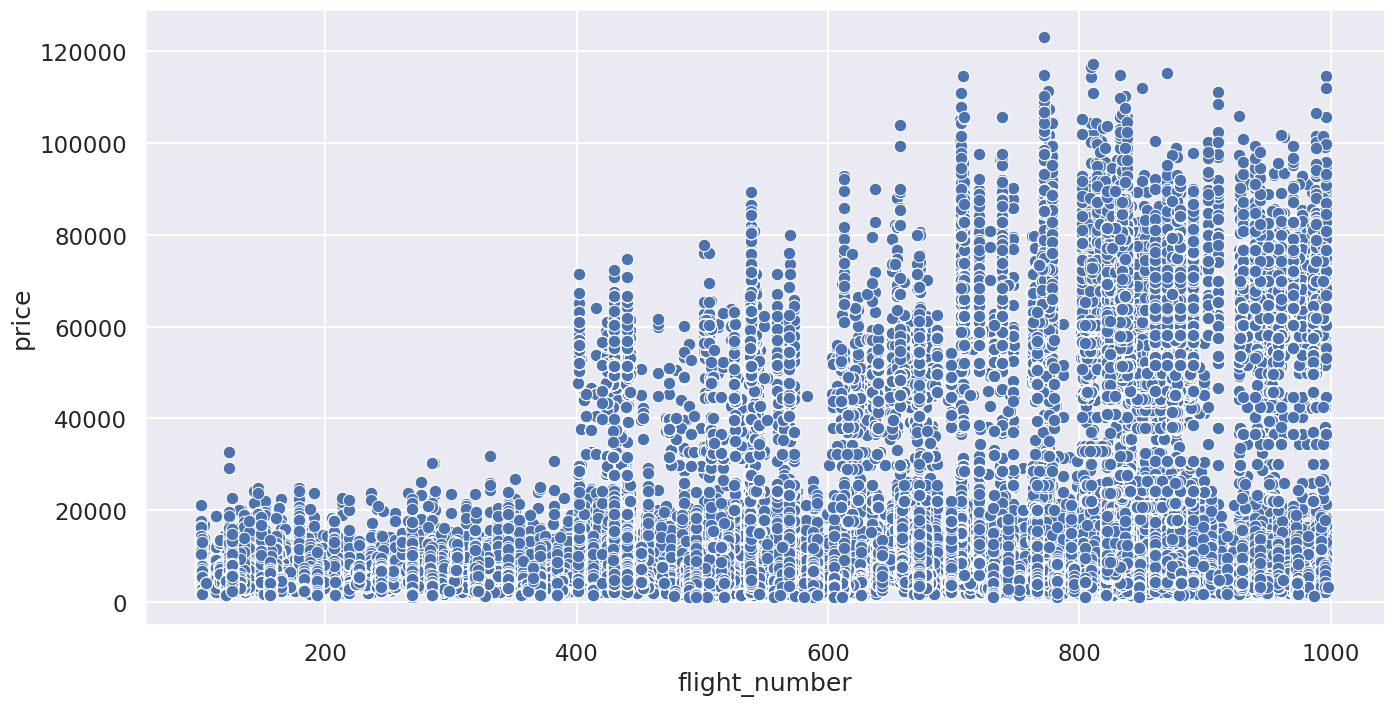

In [49]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df[df['flight_number'] < 1000], x='flight_number', y='price')
plt.show()

In [50]:
airlines = df['airline'].unique()

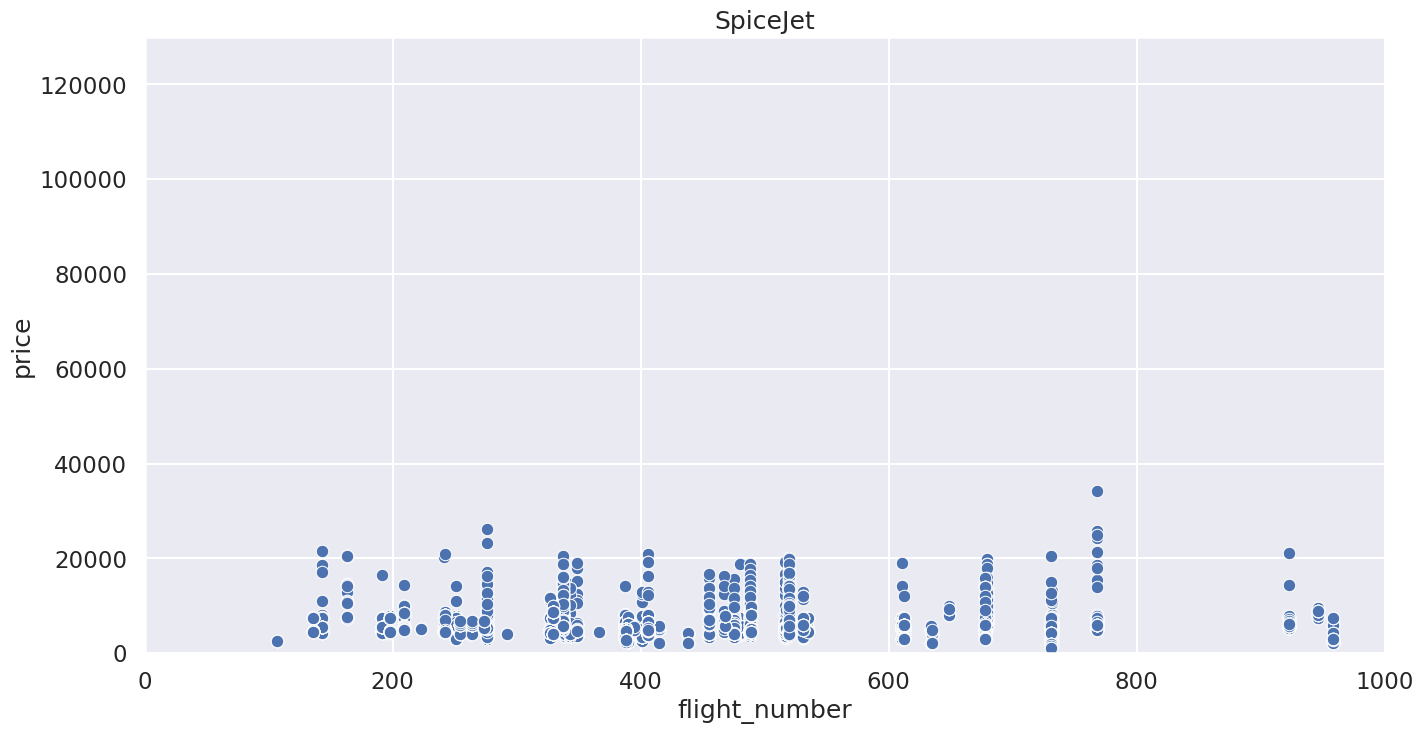

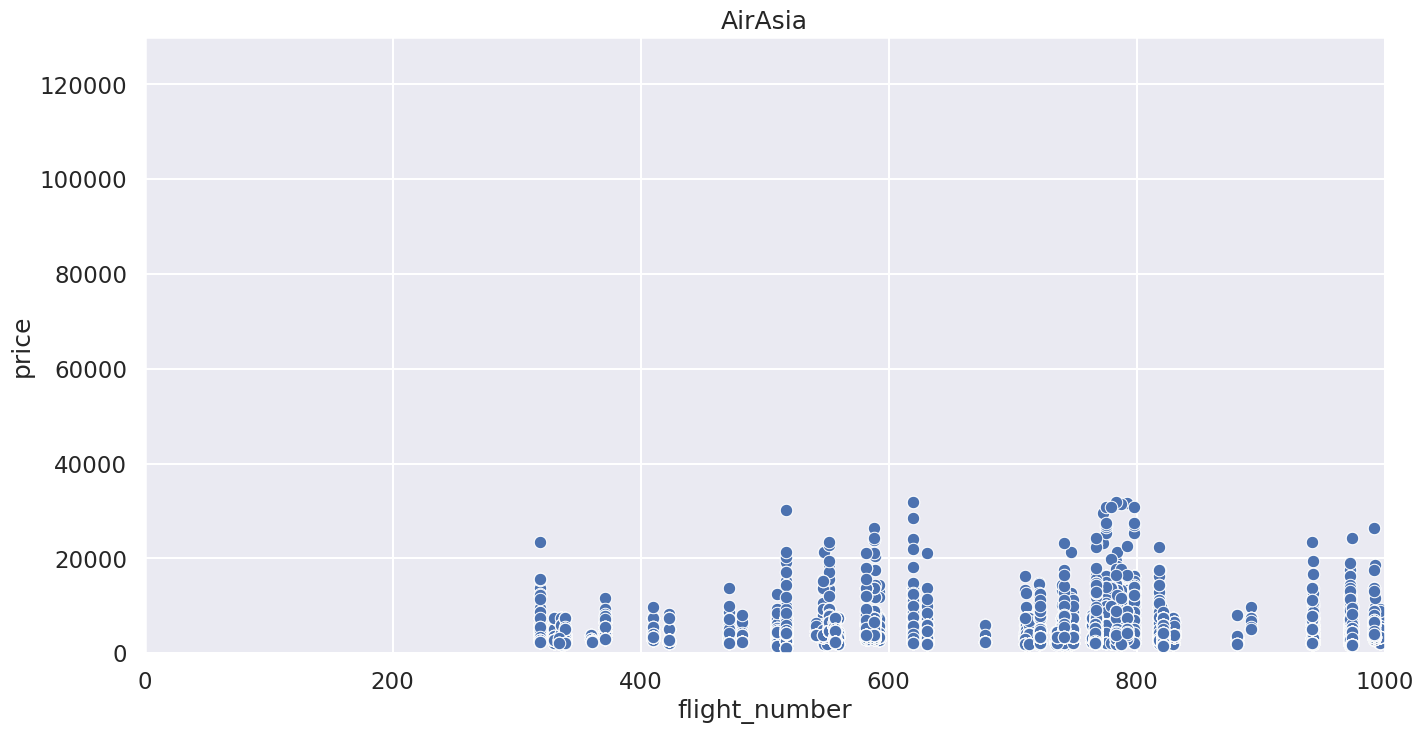

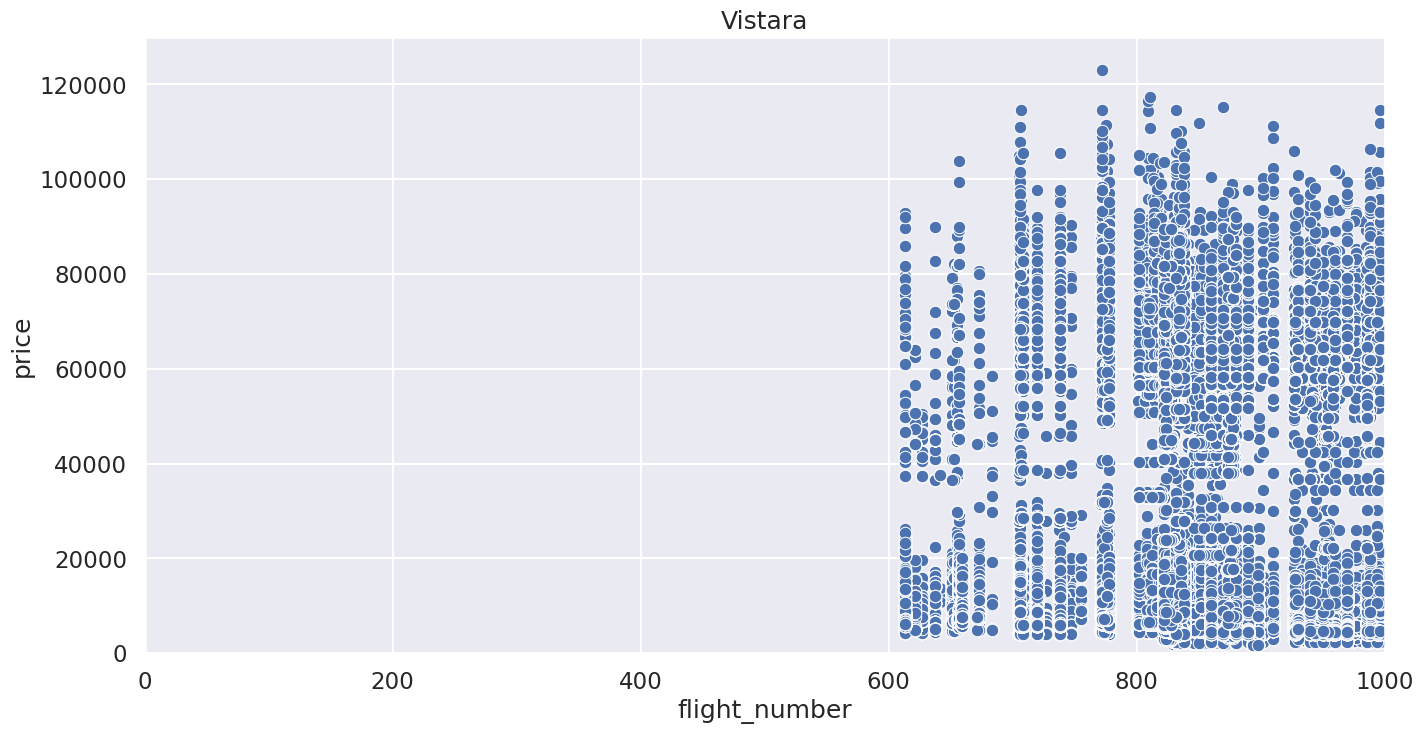

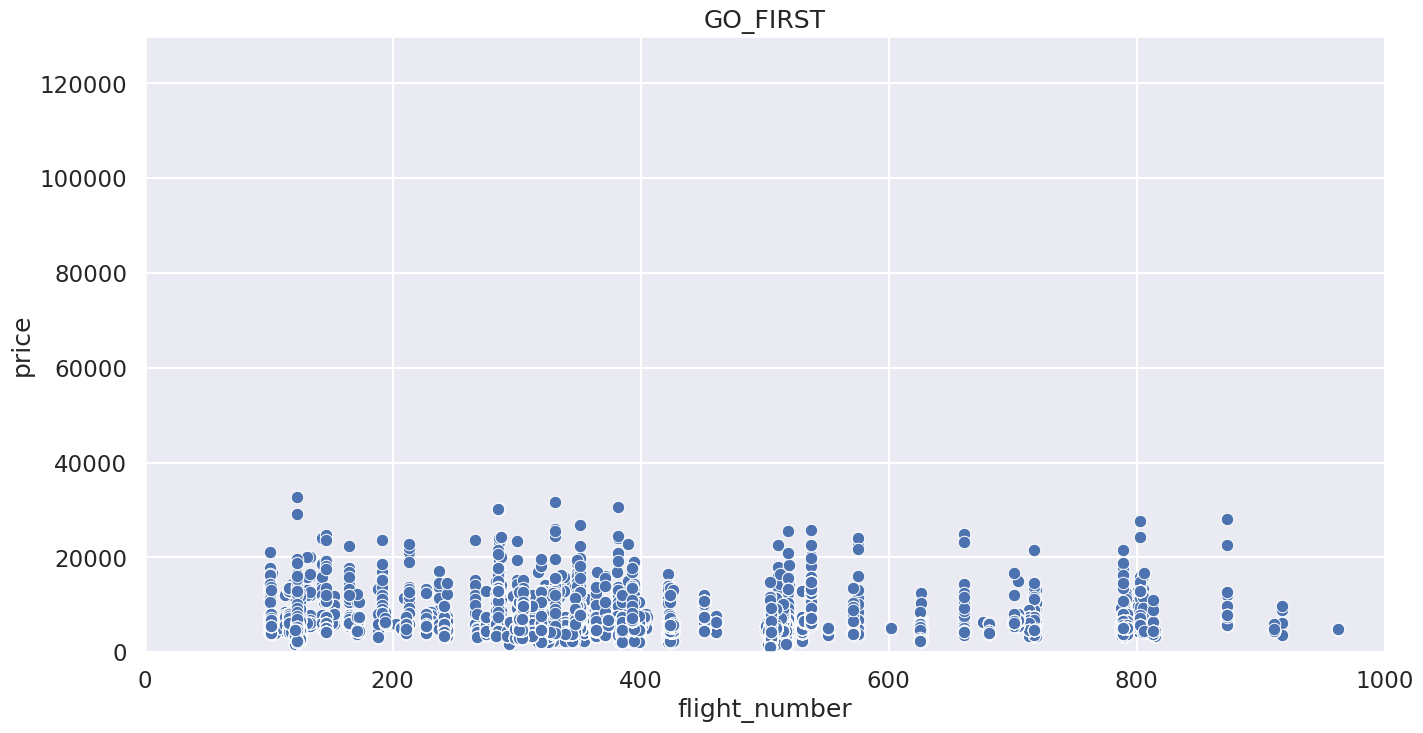

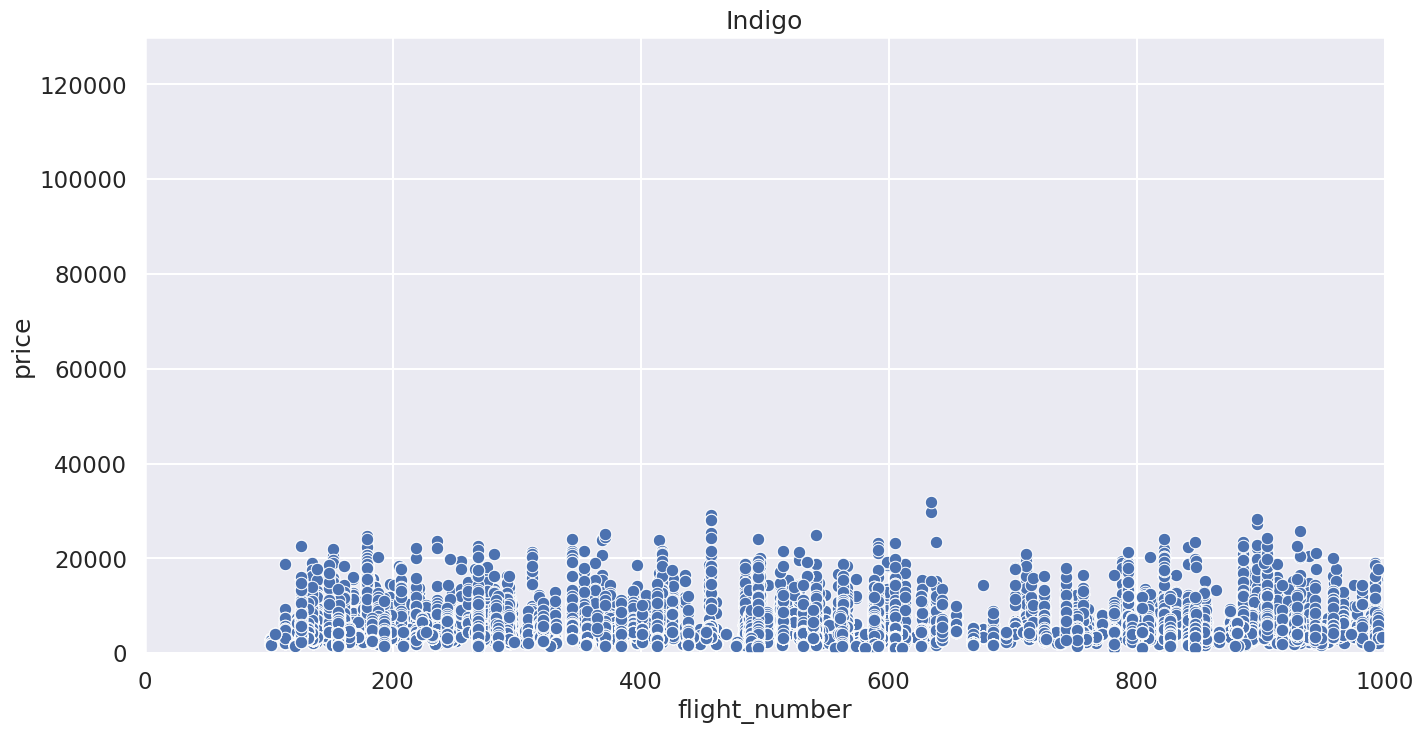

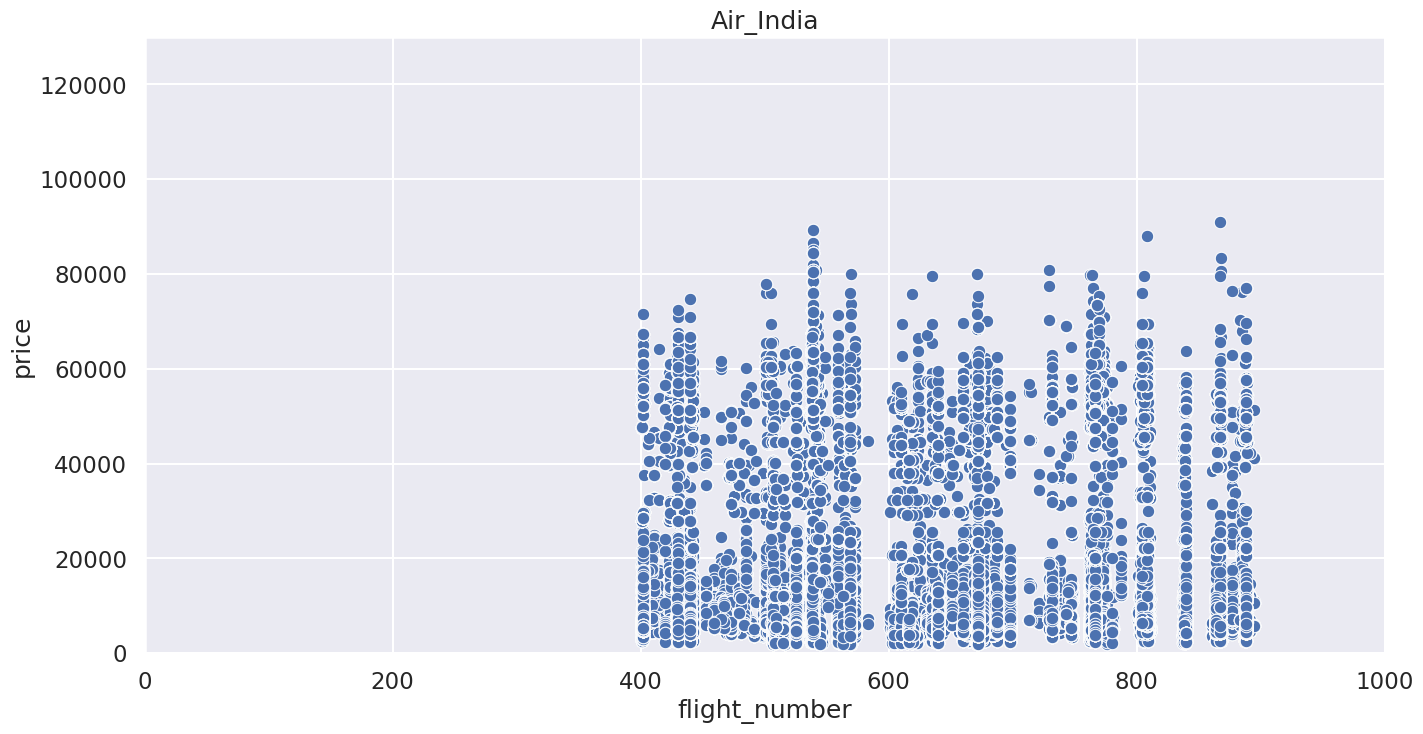

In [51]:
# 'flight_number'が1000未満の'airline'ごとの価格
for airline in airlines:
    df_temp = df[df['airline'] == airline]
    plt.figure(figsize=(16, 8))
    sns.scatterplot(data=df_temp[df_temp['flight_number'] < 1000], x='flight_number', y='price')
    plt.title(airline)
    # スケールを一定にしておく
    plt.xlim(0, 1000)
    plt.ylim(0, 130000)
    plt.show()

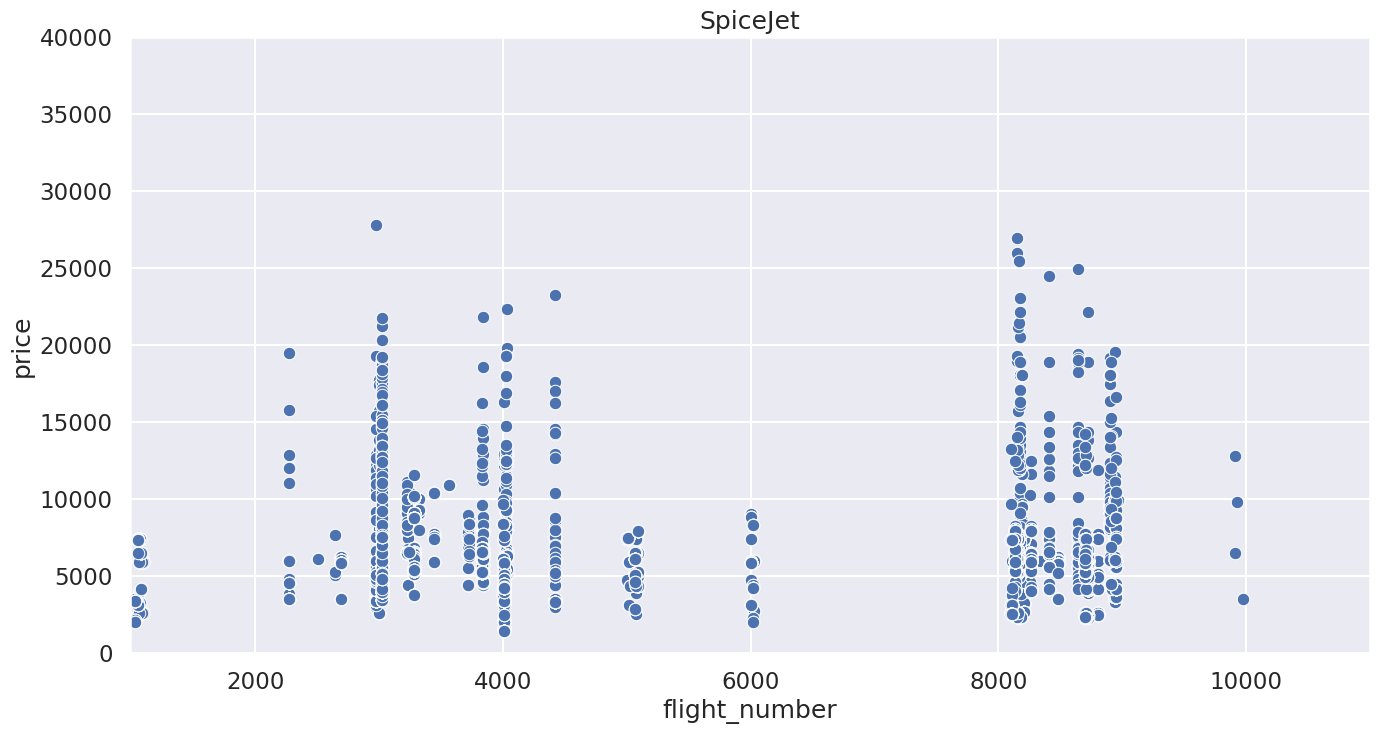

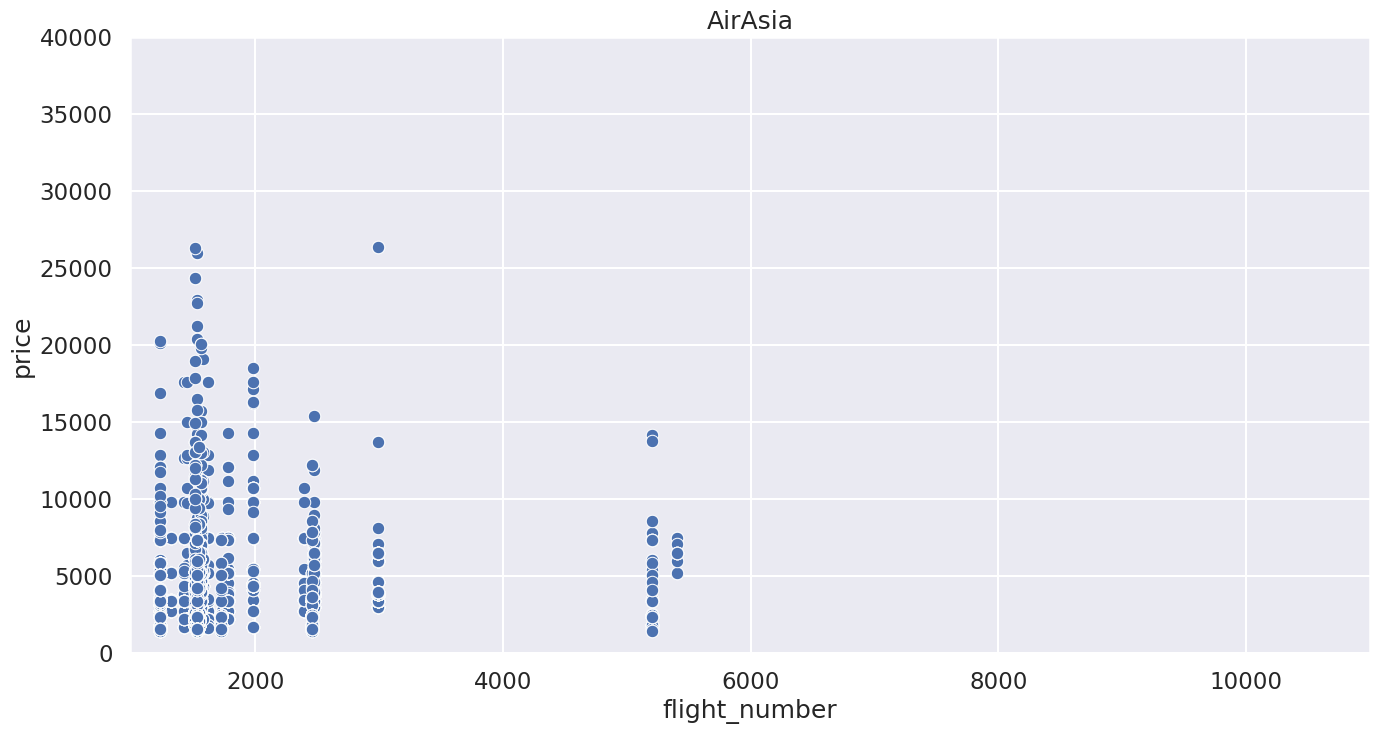

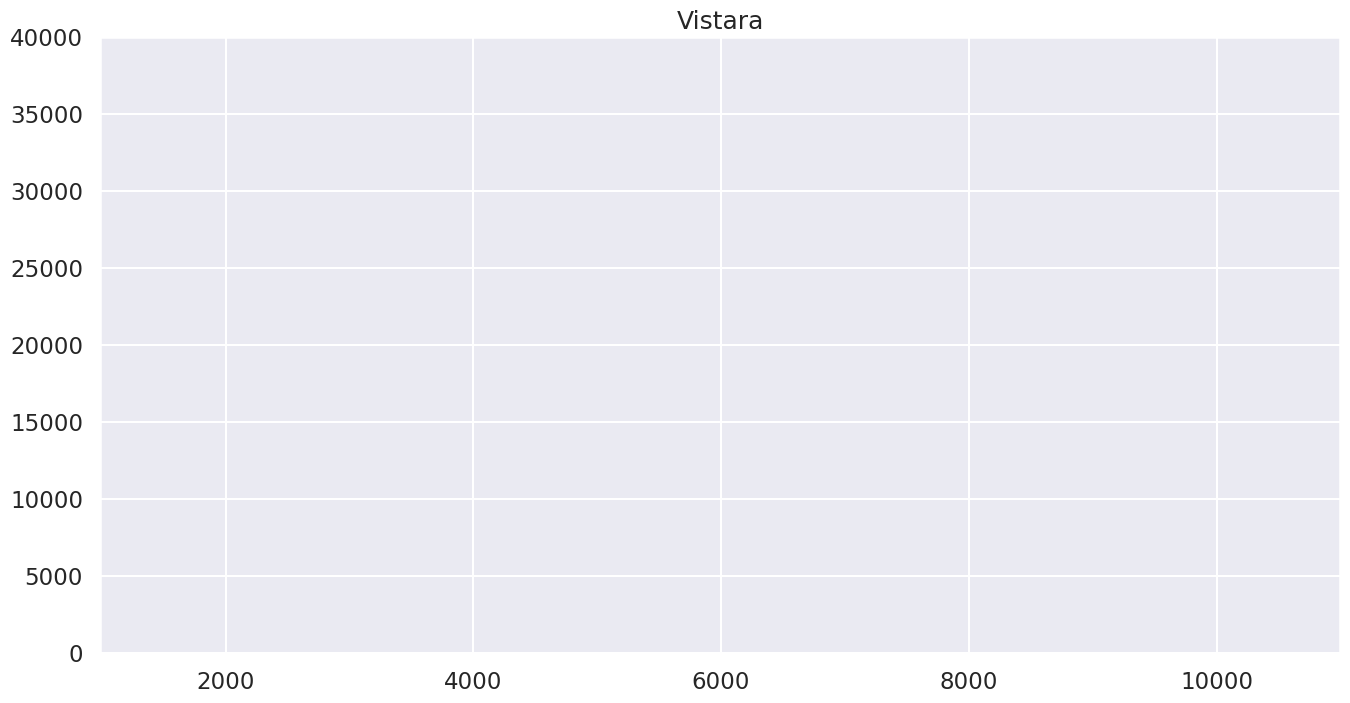

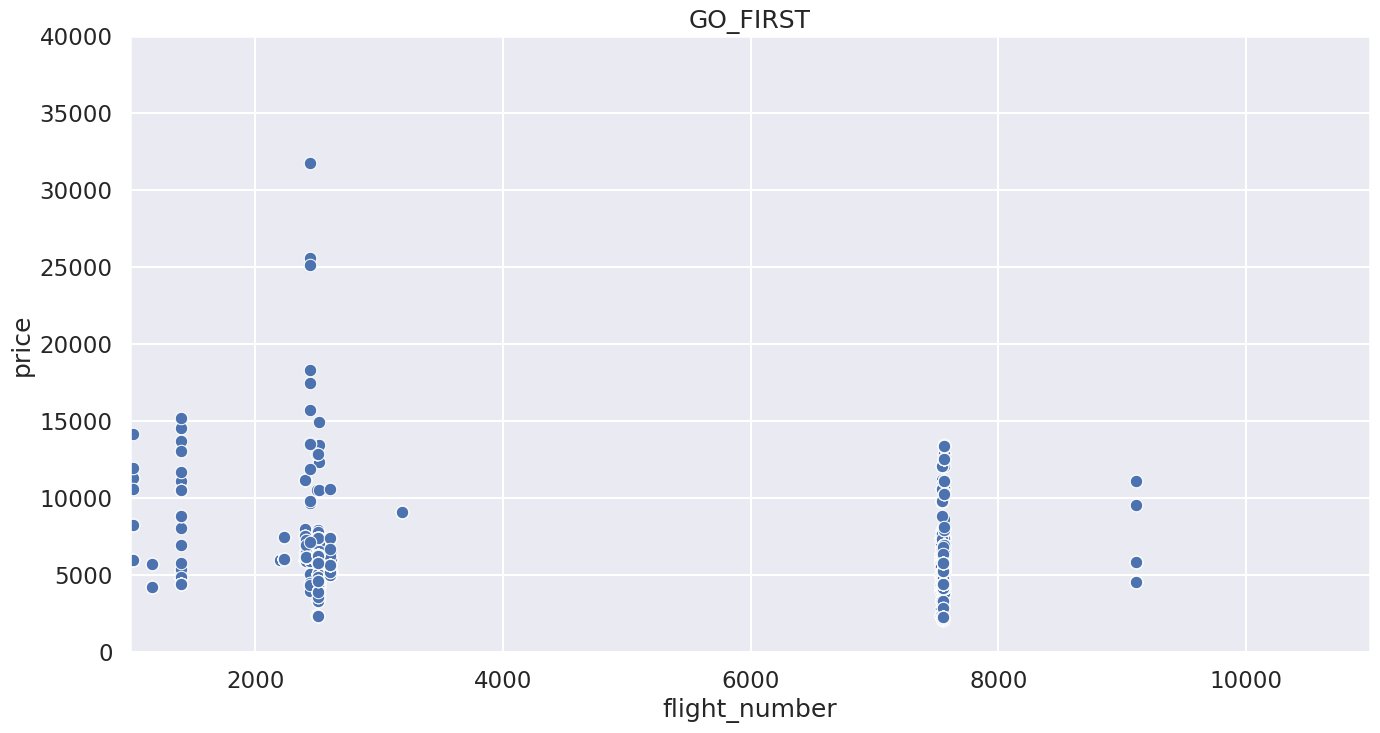

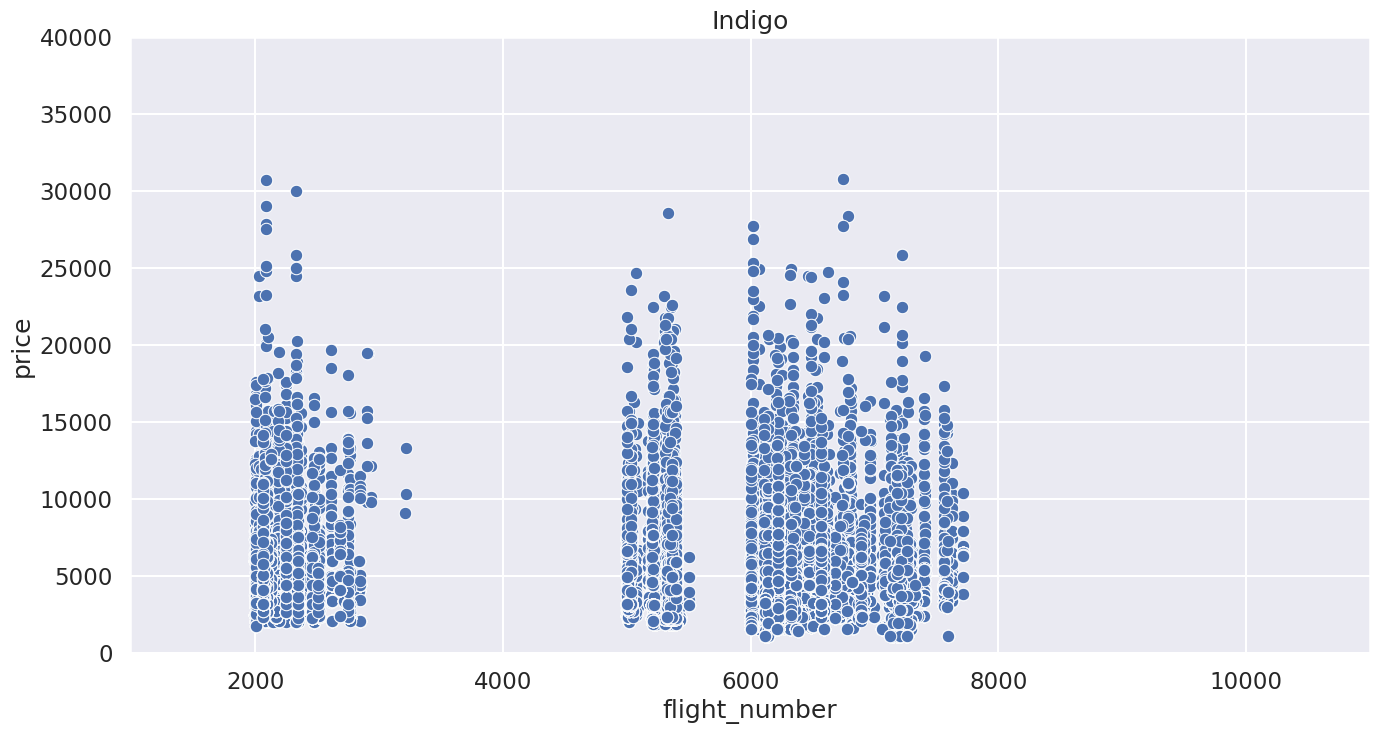

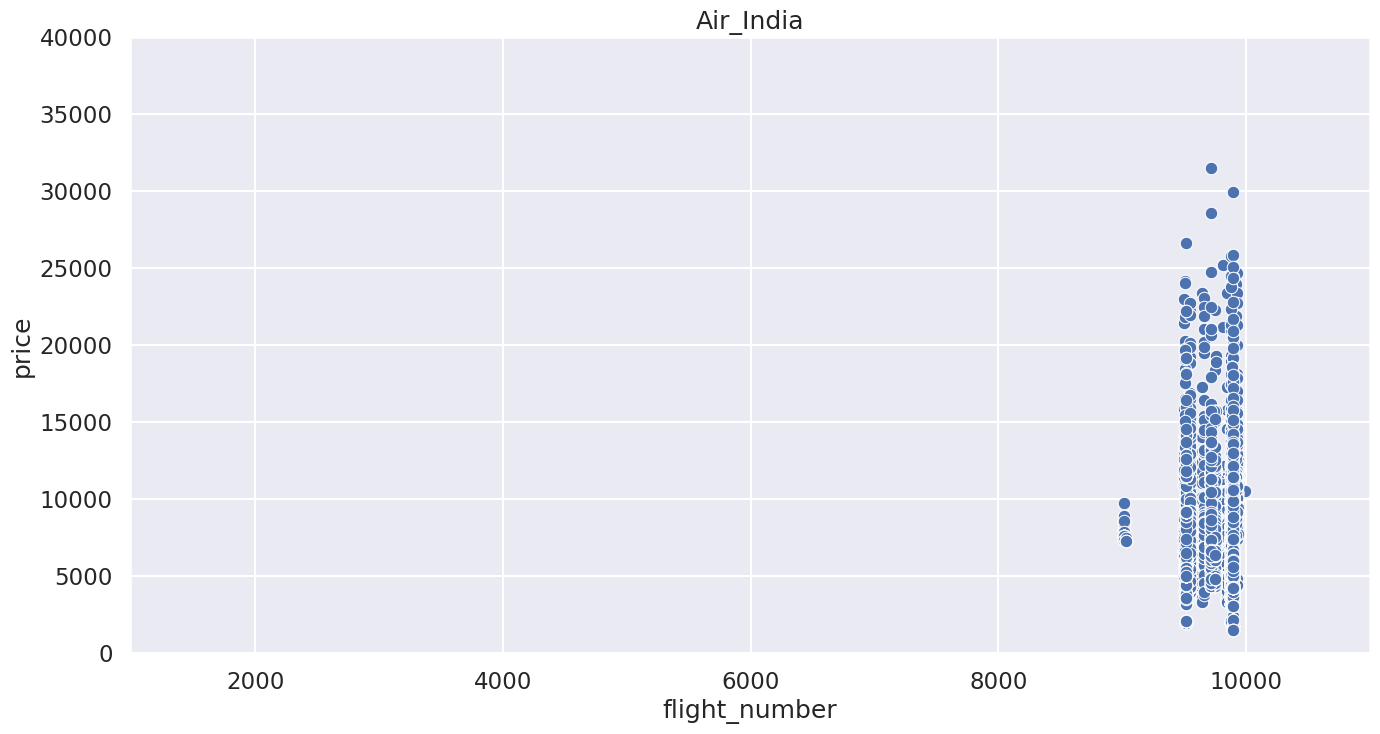

In [52]:
# 'flight_number'が1000以上の'airline'ごとの価格
for airline in airlines:
    df_temp = df[df['airline'] == airline]
    plt.figure(figsize=(16, 8))
    sns.scatterplot(data=df_temp[df_temp['flight_number'] >= 1000], x='flight_number', y='price')
    plt.title(airline)
    # スケールを一定にしておく
    plt.xlim(990, 11000)
    plt.ylim(0, 40000)
    plt.show()

In [53]:
# 重複および不要なカラムを削除
df.drop(columns=['flight', 'flight_code', 'flight_number'], inplace=True)

In [54]:
cat_features.remove('flight')
cat_features.remove('flight_code')
cat_features.remove('flight_number')

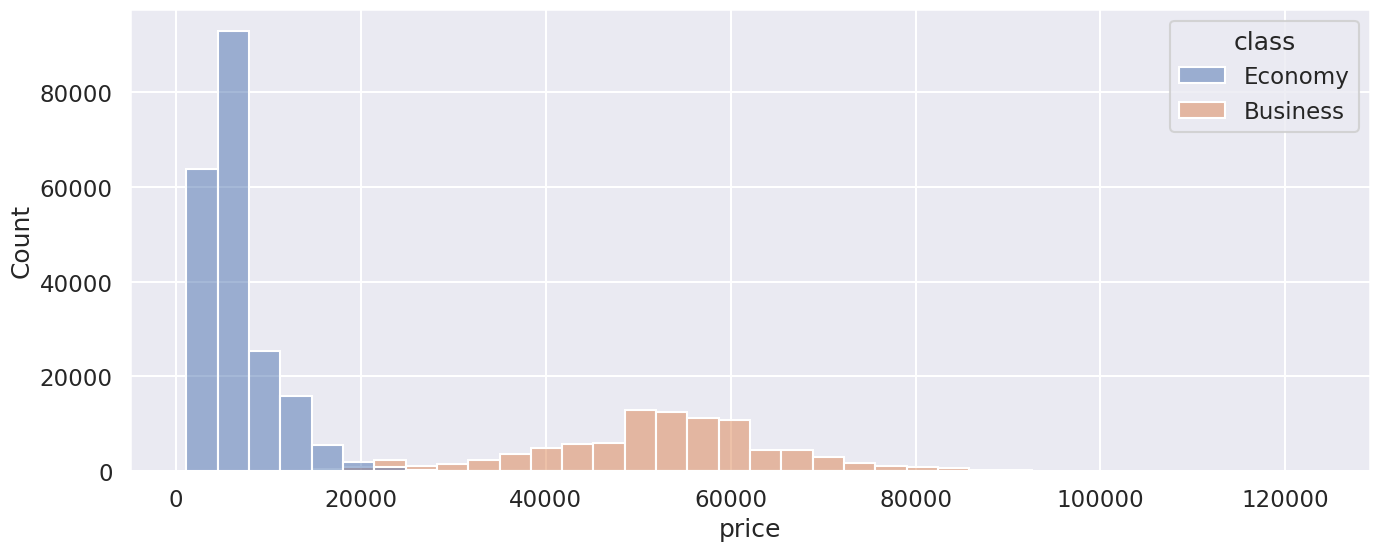

In [55]:
# エコノミークラスとビジネスクラスでの価格の違い
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='price', hue='class', bins=36)
plt.show()

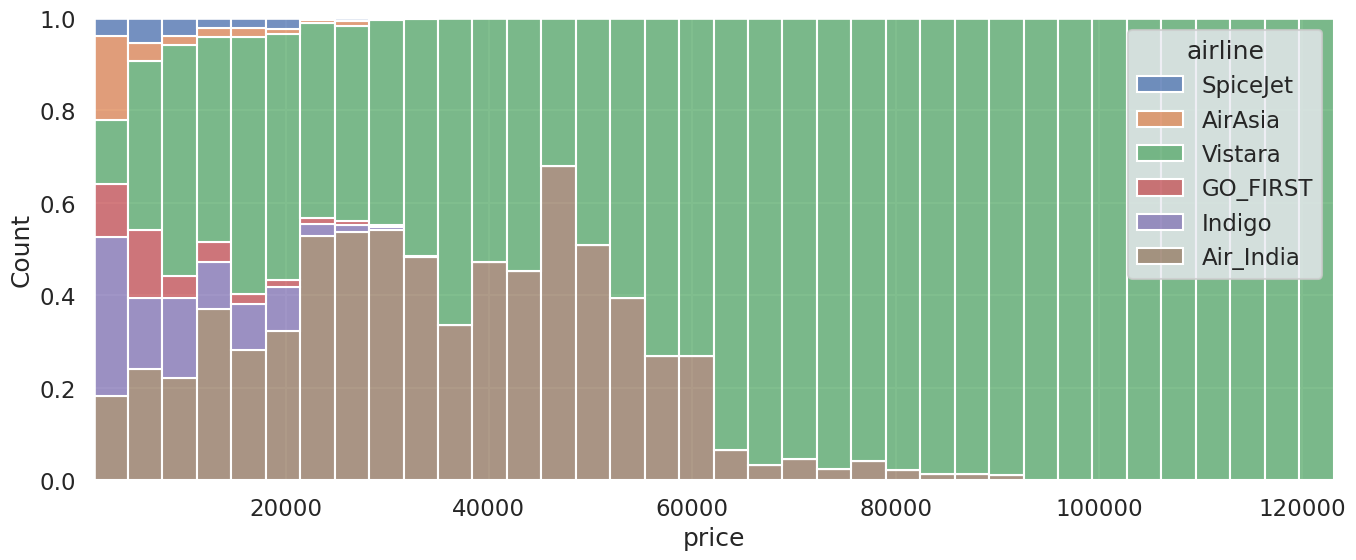

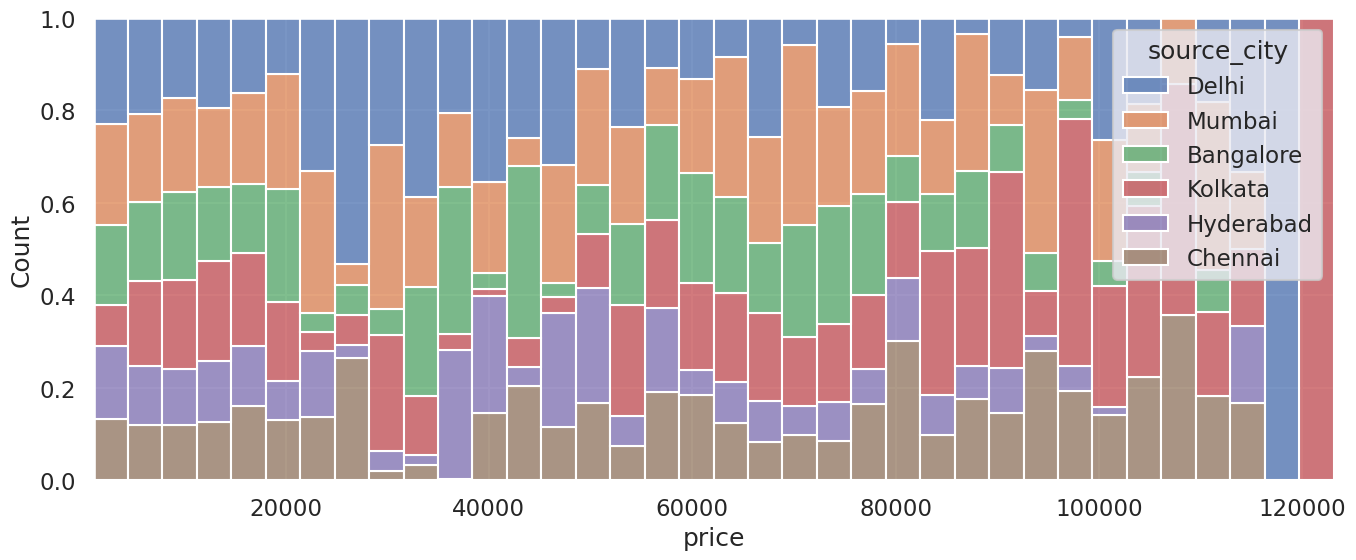

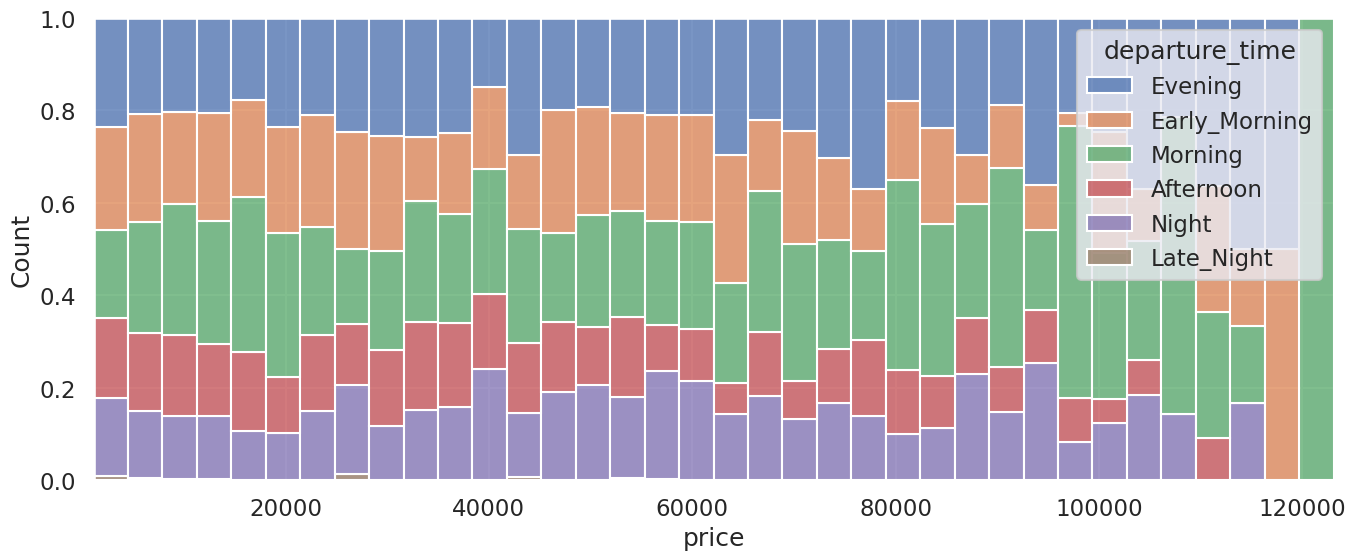

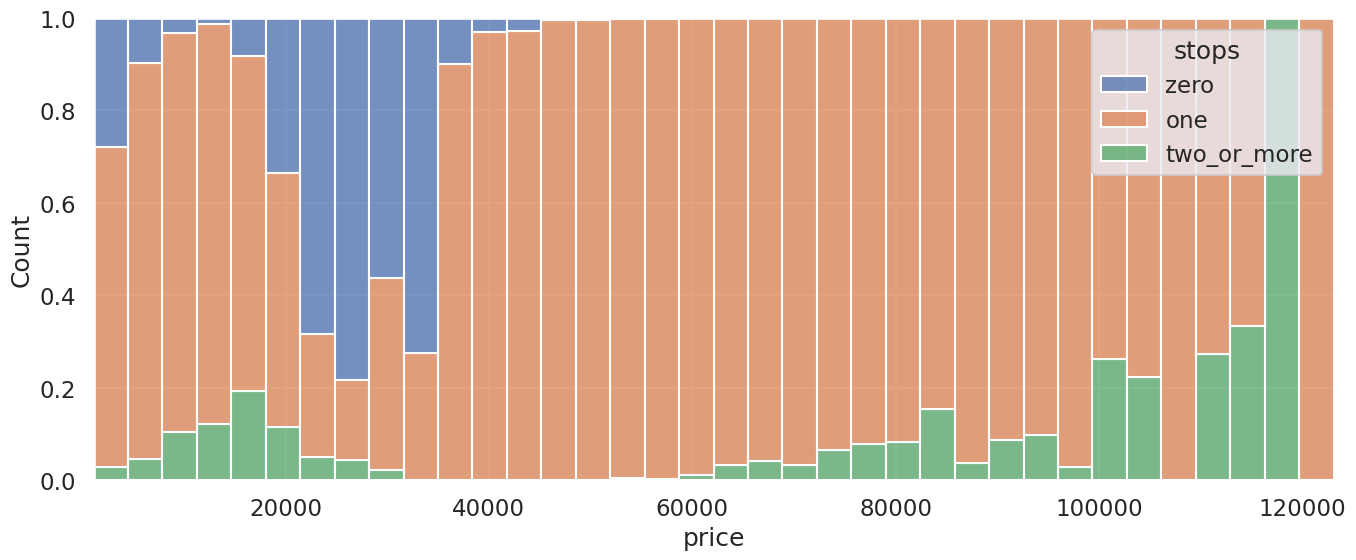

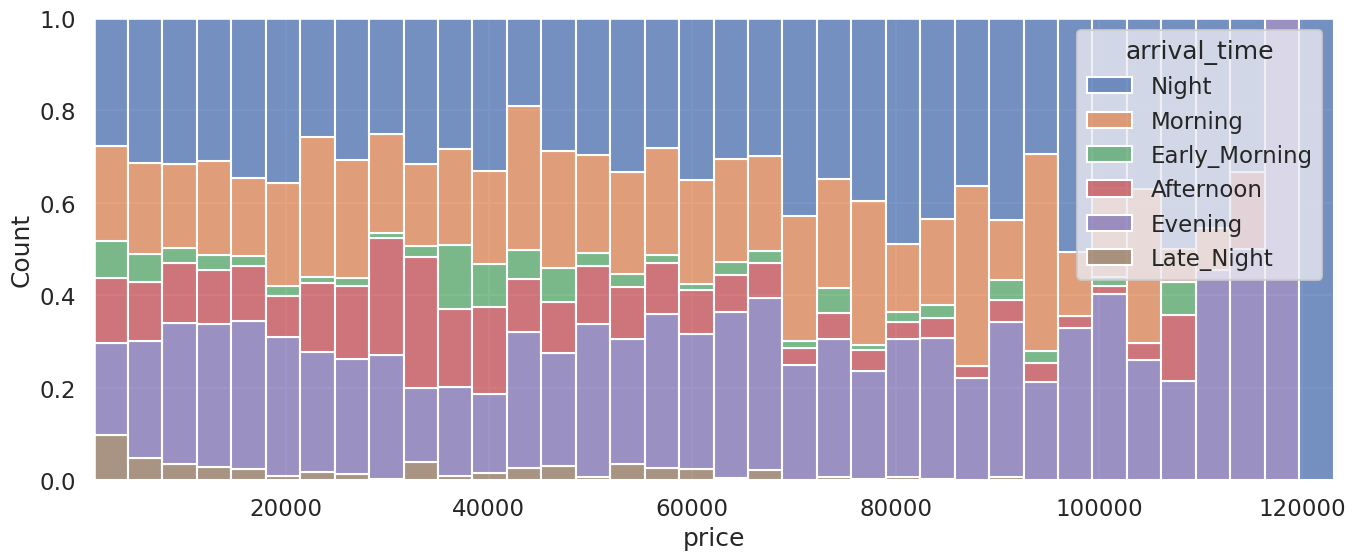

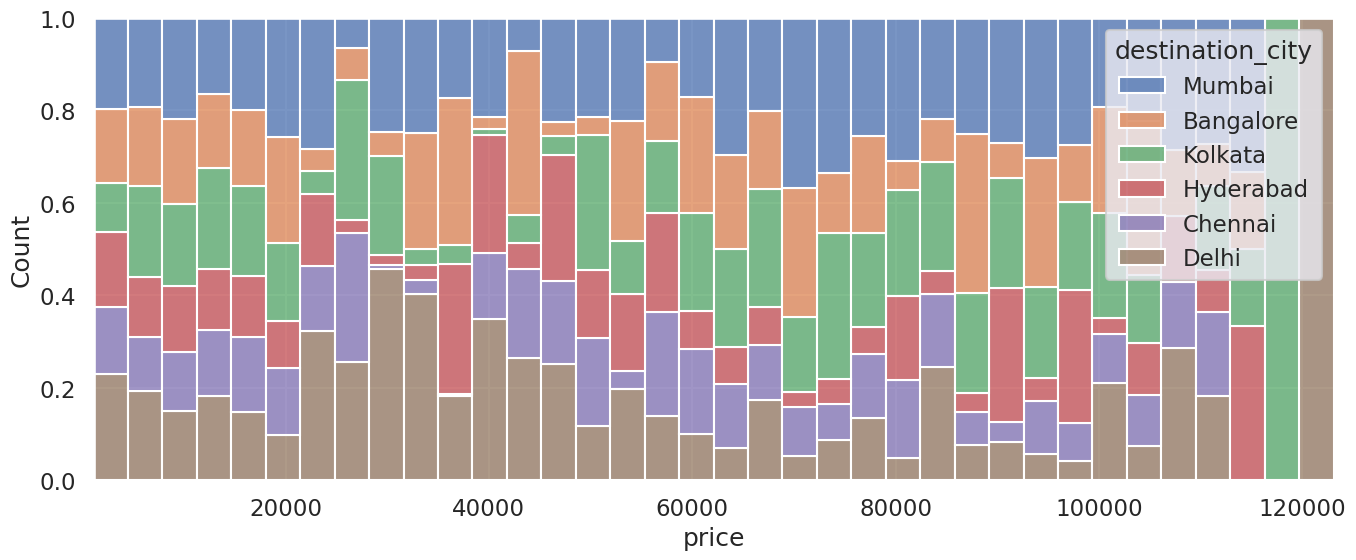

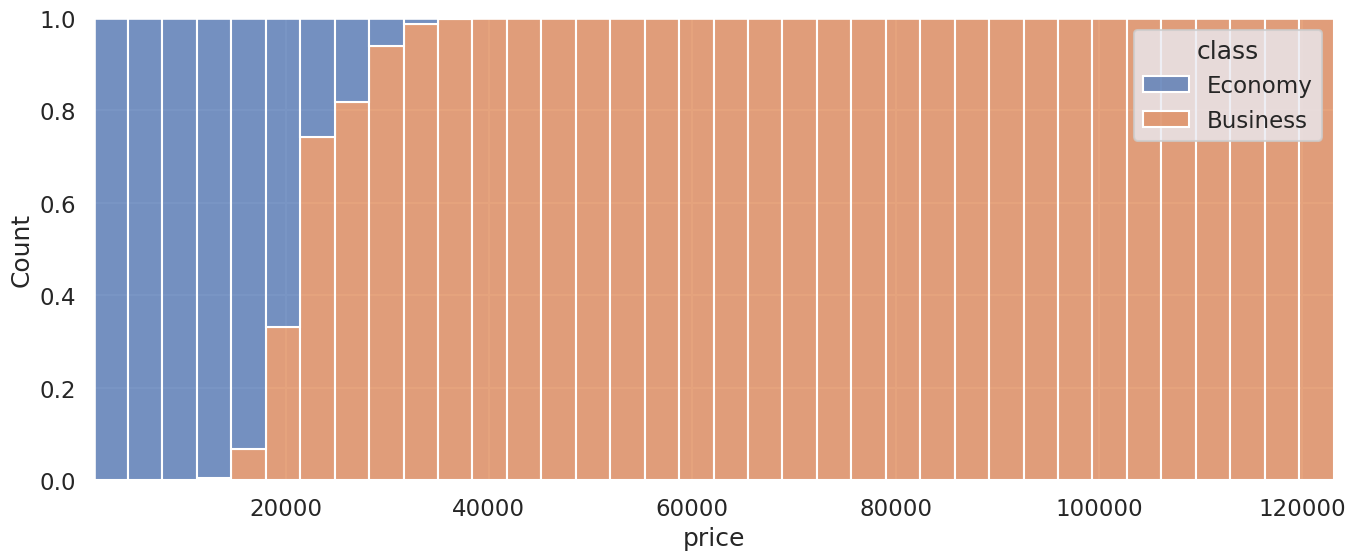

In [56]:
for feature in cat_features:
    plt.figure(figsize=(16, 6))
    sns.histplot(data=df, x='price', hue=feature, multiple='fill', bins=36)
    plt.show()

In [57]:
df[num_features + ['price']].corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 25.2+ MB


In [61]:
# トレーニングデータとテストデータに分ける
target = "price"
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240122, 9), (60031, 9), (240122,), (60031,))

In [63]:
encoder = OneHotEncoder(drop='first')

In [64]:
X_train_cat_array = encoder.fit_transform(X_train[cat_features])
X_test_cat_array = encoder.transform(X_test[cat_features])
X_train_cat_array[:3].toarray()

array([[0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.]])

In [67]:
n = 0
for feature in cat_features:
    n += df[feature].nunique()
n - len(cat_features)

28

In [68]:
X_train_num_array = X_train[num_features].values
X_test_num_array = X_test[num_features].values
X_train_num_array[:3]

array([[ 7.33, 22.  ],
       [23.  ,  4.  ],
       [23.33, 27.  ]])

In [71]:
X_train = np.concatenate([X_train_cat_array.toarray(), X_train_num_array], axis=1)
X_test = np.concatenate([X_test_cat_array.toarray(), X_test_num_array], axis=1)
X_train[:3]

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  7.33, 22.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         0.  , 23.  ,  4.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         0.  , 23.33, 27.  ]])

In [72]:
rf_model = RandomForestRegressor(random_state=17)

In [73]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=17)

In [74]:
pred = rf_model.predict(X_test)

In [75]:
# R2 scoreの確認
rf_model.score(X_test, y_test)

0.9852010062832298

In [76]:
# その他の確認
mae = np.round(mean_absolute_error(y_test, pred), 4)
mse = np.round(mean_squared_error(y_test, pred), 4)
mape = np.round(mean_absolute_percentage_error(y_test, pred), 4)
print(mae, mse, mape)

1085.5857 7645572.3501 0.0716
